The datasets below contain internal and external information that are available for each client. They provide a view into the financial history of consumers, historical loan application, their demographics and their loan repayment habits. </br>

The goal is to train a machine learning algorithm that predicts which consumers qualify for loans. 
This is a multiclass classification problem as we are trying to bin each consumer into a bucket, where each bucket is a label reflecting the risk associated with approving an applicant's loan

# Understanding the data:

1a. Check the size of the dataset. Both in terms of the numbers of rows and columns and also memory usage </br>
1b. Check for missing data and decide how to handle missing values </br>
1c. Check data types and ensure that the columns have the appropriate data type. Also check that the values wihtin each column align with the expected range of values in that column </br>
1d. Generate summary statistics (e.g., mean, median, standard deviation) to understand the distribution of the data</br>
1e. Examine the distribution of the target variable

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [132]:
internal= pd.read_excel('data/case_study1.xlsx')

In [133]:
external= pd.read_excel('data/case_study2.xlsx')

In [134]:
df1= internal.copy()
df2= external.copy()

In [135]:
df1.head()
df1.tail()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
51331,51332,3,0,3,1,0,0.333,0.00,1.0,0.0,1,0,0.333,0.00,0,0,0,2,0,0,0,0,3,1,24,5
51332,51333,4,2,2,0,1,0.000,0.25,0.5,0.5,2,1,0.500,0.25,0,2,0,2,0,0,0,2,2,0,74,7
51333,51334,2,1,1,1,1,0.500,0.50,0.5,0.5,2,1,1.000,0.50,0,0,0,2,0,0,0,0,2,0,9,5
51334,51335,2,1,1,0,0,0.000,0.00,0.5,0.5,1,1,0.500,0.50,0,0,0,2,0,0,0,0,2,0,15,8
51335,51336,1,0,1,0,0,0.000,0.00,1.0,0.0,0,0,0.000,0.00,0,1,0,0,0,0,0,1,0,0,20,20


In [136]:
df2.head()
df2.tail()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
51331,51332,15,24,23,2,24,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,4,0,0,0,0,0,0,0,3,3,1,Married,12TH,43,M,18500,249,1.0,1.0,0.230,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,6,4,6,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,203,1,0,0,Married,SSC,31,M,25000,186,0.5,0.0,0.660,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,2,2,2,1,5,4,2,Married,SSC,28,M,18000,66,0.5,0.5,0.428,-99999.0,0,-99999.0,0,1.0,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,242,1,0,0,Single,UNDER GRADUATE,25,F,12802,54,0.5,0.0,0.143,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2
51335,51336,74,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,18,4,10,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,13,1,1,1,Married,SSC,25,M,16000,102,1.0,0.0,0.333,-99999.0,0,-99999.0,0,0.0,0.0,0.0,0.0,-99999.000,0,0,others,others,681,P2


In [137]:
df1.shape
df2.shape

(51336, 26)

(51336, 62)

In [138]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [139]:
# Get deep memory usage (including objects) unit in bytes
deep_memory_usage_df1 = df1.memory_usage(deep=True).sum()
deep_memory_usage_df2 = df2.memory_usage(deep=True).sum()
print(deep_memory_usage_df1)
print(deep_memory_usage_df2)

10678016
42098866


First, let's explore the internal data present in df1

In [140]:
df1.isnull().sum()

PROSPECTID              0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [141]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.75,25668.500,38502.250,51336.0
Total_TL,51336.0,4.858598,7.177116,1.0,1.00,2.000,5.000,235.0
Tot_Closed_TL,51336.0,2.770415,5.941680,0.0,0.00,1.000,3.000,216.0
Tot_Active_TL,51336.0,2.088184,2.290774,0.0,1.00,1.000,3.000,47.0
Total_TL_opened_L6M,51336.0,0.736754,1.296717,0.0,0.00,0.000,1.000,27.0
Tot_TL_closed_L6M,51336.0,0.428919,0.989972,0.0,0.00,0.000,1.000,19.0
pct_tl_open_L6M,51336.0,0.184574,0.297414,0.0,0.00,0.000,0.308,1.0
pct_tl_closed_L6M,51336.0,0.089095,0.205635,0.0,0.00,0.000,0.053,1.0
pct_active_tl,51336.0,0.577542,0.379867,0.0,0.25,0.556,1.000,1.0
pct_closed_tl,51336.0,0.422458,0.379867,0.0,0.00,0.444,0.750,1.0


# Preprocessing the Internal Data File

## Handling missing and erroneous values

The columns Age_Oldest_TL and Age_Newest_TL contain minimum values of -9999999, which do not convey any meaningful information. Therefore, these values will be treated as NaN.

The next step is to calculate the proportion of -9999 occurrences in each of these columns

In [142]:
error_prct_old = len(df1[df1.loc[:,'Age_Oldest_TL']==-99999])/len(df1)*100
print("The value -99999 exists in {error_prct_old}% percent of the Age of Oldest trade lines".format(error_prct_old=error_prct_old))

error_prct_new = len(df1[df1.loc[:,'Age_Newest_TL']==-99999])/len(df1)*100
print("The value -99999 exists in {error_prct_new}% percent of the Age of the newest trade lines".format(error_prct_new=error_prct_new))


The value -99999 exists in 0.07791803023219572% percent of the Age of Oldest trade lines
The value -99999 exists in 0.07791803023219572% percent of the Age of the newest trade lines


Because -99999 exists in a small number of records, we can go ahead and remove those rows/records from our dataset

In [143]:
df1_filtered = df1.loc[(df1['Age_Oldest_TL'] != -99999)& (df1['Age_Newest_TL'] != -99999)]

In [144]:
df1_filtered.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


## Handling outliers and skewness

To assess the skewness of our data, we will begin by using the .skew() method. Values greater than 0, indicate right skewness, whereas values less than 0 indicate left skewness. O indicates no skewness

In [145]:
df1_filtered.skew()

PROSPECTID              0.000077
Total_TL                5.811968
Tot_Closed_TL           7.403441
Tot_Active_TL           2.886070
Total_TL_opened_L6M     3.413909
Tot_TL_closed_L6M       4.450218
pct_tl_open_L6M         1.639910
pct_tl_closed_L6M       2.972300
pct_active_tl          -0.223169
pct_closed_tl           0.223169
Total_TL_opened_L12M    3.518031
Tot_TL_closed_L12M      4.709043
pct_tl_open_L12M        0.471489
pct_tl_closed_L12M      1.998548
Tot_Missed_Pmnt         5.293706
Auto_TL                 3.513688
CC_TL                   9.508079
Consumer_TL             5.038560
Gold_TL                 9.883189
Home_TL                 7.031627
PL_TL                   6.793932
Secured_TL              7.800861
Unsecured_TL            4.029064
Other_TL                6.765939
Age_Oldest_TL           1.617959
Age_Newest_TL           3.588789
dtype: float64

Next, let's visualize the distribution of each variable to better understand the degree of skewness

<Axes: xlabel='PROSPECTID', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PROSPECTID')

Text(0.5, 0, 'PROSPECTID')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total_TL')

Text(0.5, 0, 'Total_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_Closed_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_Closed_TL')

Text(0.5, 0, 'Tot_Closed_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_Active_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_Active_TL')

Text(0.5, 0, 'Tot_Active_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_TL_opened_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total_TL_opened_L6M')

Text(0.5, 0, 'Total_TL_opened_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_TL_closed_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_TL_closed_L6M')

Text(0.5, 0, 'Tot_TL_closed_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_open_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_open_L6M')

Text(0.5, 0, 'pct_tl_open_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_closed_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_closed_L6M')

Text(0.5, 0, 'pct_tl_closed_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_active_tl', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_active_tl')

Text(0.5, 0, 'pct_active_tl')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_closed_tl', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_closed_tl')

Text(0.5, 0, 'pct_closed_tl')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Total_TL_opened_L12M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total_TL_opened_L12M')

Text(0.5, 0, 'Total_TL_opened_L12M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_TL_closed_L12M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_TL_closed_L12M')

Text(0.5, 0, 'Tot_TL_closed_L12M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_open_L12M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_open_L12M')

Text(0.5, 0, 'pct_tl_open_L12M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_closed_L12M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_closed_L12M')

Text(0.5, 0, 'pct_tl_closed_L12M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Tot_Missed_Pmnt', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Tot_Missed_Pmnt')

Text(0.5, 0, 'Tot_Missed_Pmnt')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Auto_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Auto_TL')

Text(0.5, 0, 'Auto_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='CC_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of CC_TL')

Text(0.5, 0, 'CC_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Consumer_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Consumer_TL')

Text(0.5, 0, 'Consumer_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Gold_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Gold_TL')

Text(0.5, 0, 'Gold_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Home_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Home_TL')

Text(0.5, 0, 'Home_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='PL_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of PL_TL')

Text(0.5, 0, 'PL_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Secured_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Secured_TL')

Text(0.5, 0, 'Secured_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Unsecured_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Unsecured_TL')

Text(0.5, 0, 'Unsecured_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Other_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Other_TL')

Text(0.5, 0, 'Other_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Age_Oldest_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Age_Oldest_TL')

Text(0.5, 0, 'Age_Oldest_TL')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='Age_Newest_TL', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Age_Newest_TL')

Text(0.5, 0, 'Age_Newest_TL')

Text(0, 0.5, 'Frequency')

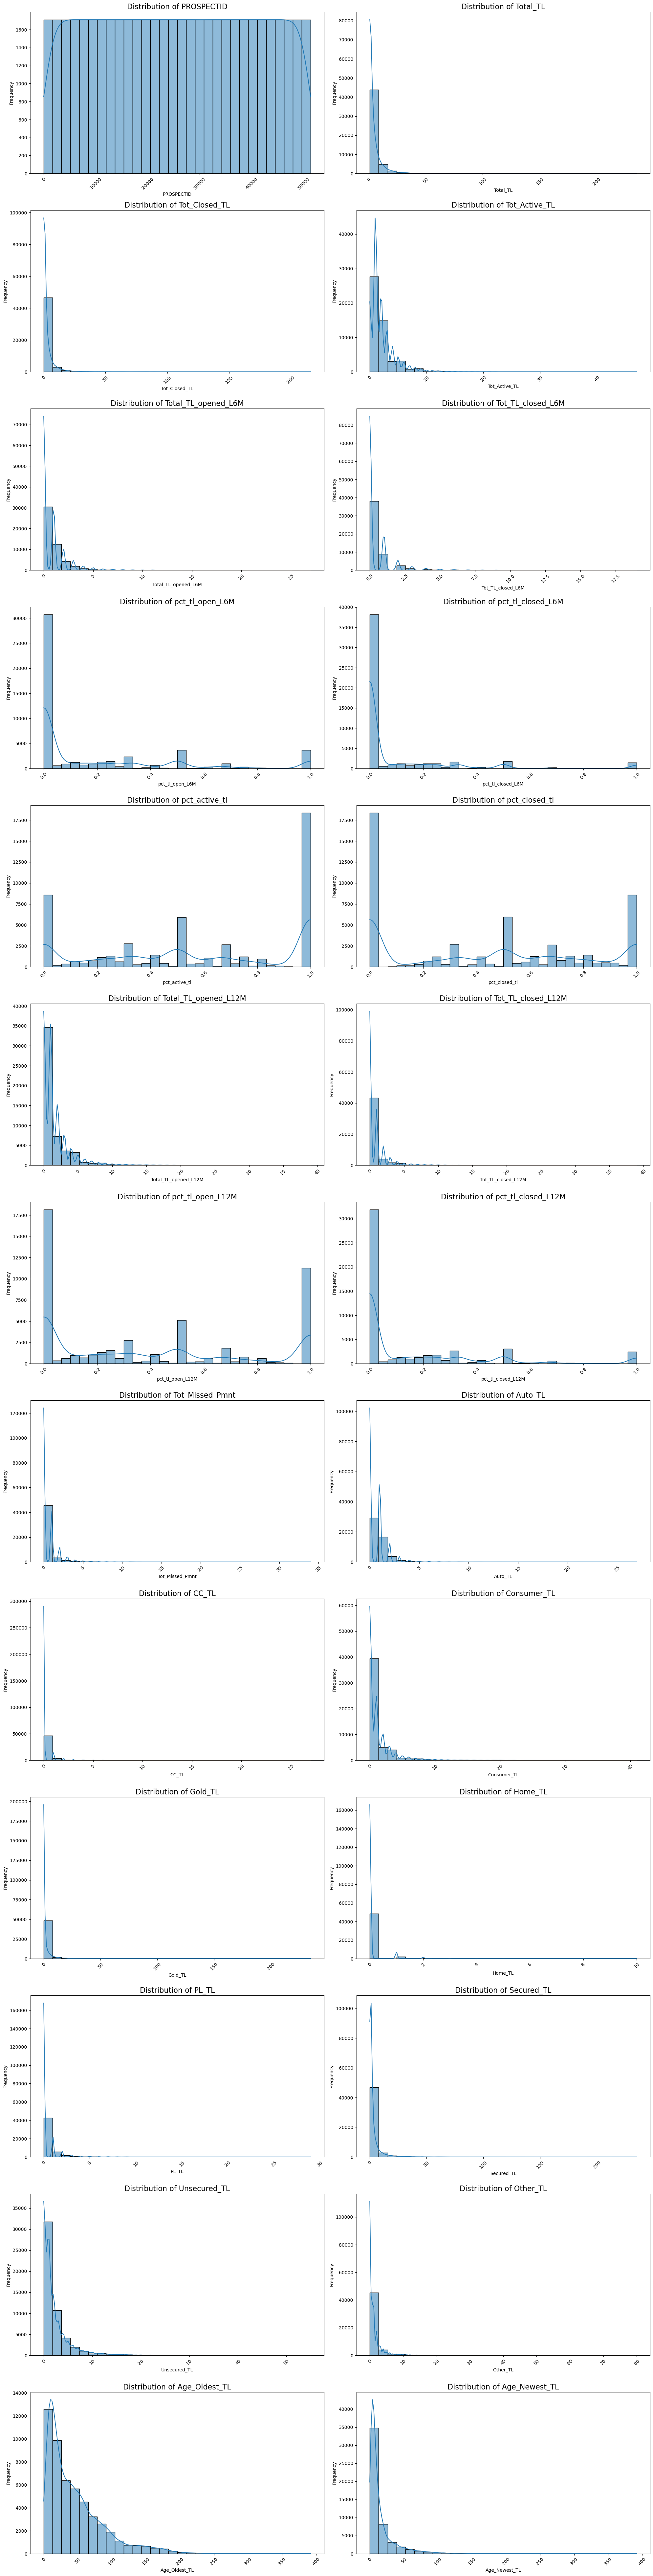

In [146]:
numeric_columns = df1_filtered.select_dtypes(include='number').columns 

# Determine the number of rows needed
n_rows = (len(numeric_columns) + 2) // 2  # Add 2 to round up if the total number isn't divisible by 3

# Create subplots
fig, axes = plt.subplots(n_rows, 2, figsize=(20, 6 * n_rows))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Loop through each column and plot its histogram
for i, col in enumerate(numeric_columns):
    sns.histplot(df1_filtered[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots 
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

<Axes: xlabel='pct_tl_open_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_open_L6M')

Text(0.5, 0, 'pct_tl_open_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_tl_closed_L6M', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_tl_closed_L6M')

Text(0.5, 0, 'pct_tl_closed_L6M')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_active_tl', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_active_tl')

Text(0.5, 0, 'pct_active_tl')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pct_closed_tl', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of pct_closed_tl')

Text(0.5, 0, 'pct_closed_tl')

Text(0, 0.5, 'Frequency')

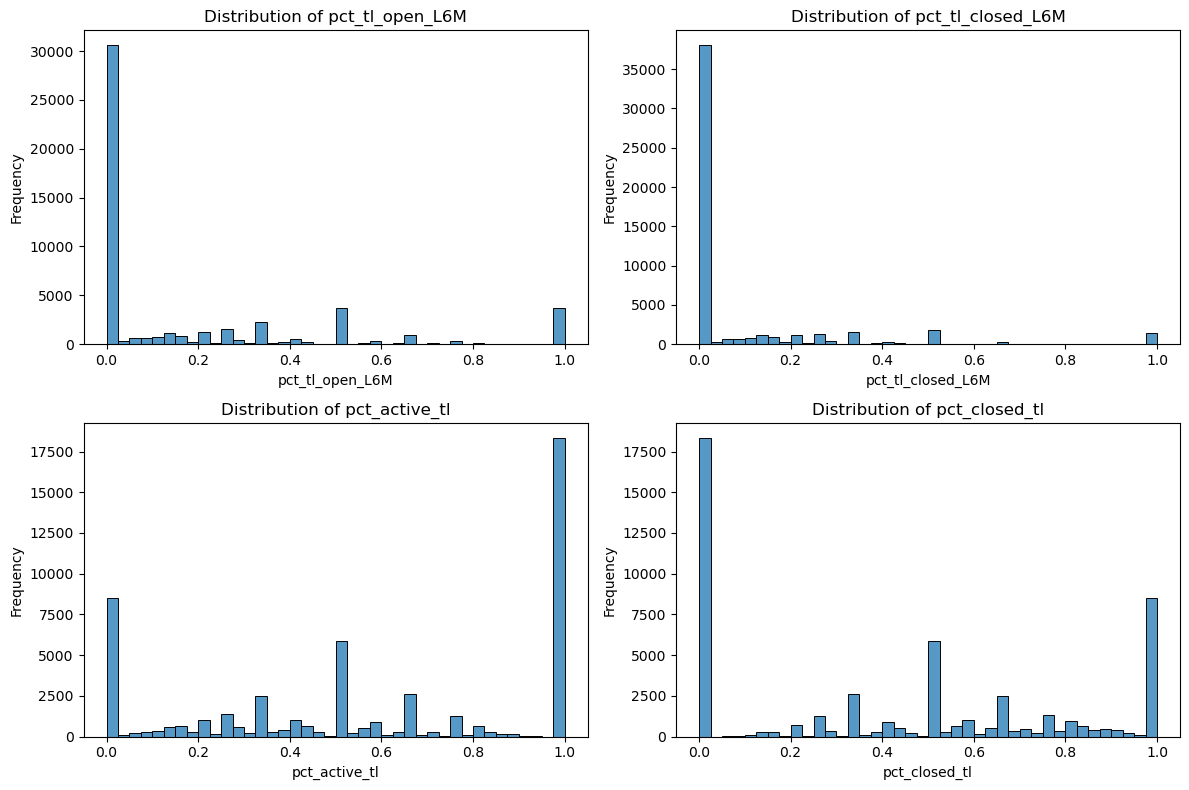

In [17]:
# Zoom into percent accounts

columns_to_plot = ['pct_tl_open_L6M', 'pct_tl_closed_L6M','pct_active_tl','pct_closed_tl']

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns_to_plot):
    sns.histplot(df1_filtered[col], ax=axes[i], bins=40, kde=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout
plt.tight_layout()
plt.show()

## Boxplots

In [147]:
#remove the PROSPECTID column- it doesn't require any further transformation or visualization
df1_filt= df1_filtered.drop(['PROSPECTID'],axis= 1)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Total_TL'),
  Text(1, 0, 'Tot_Closed_TL'),
  Text(2, 0, 'Tot_Active_TL'),
  Text(3, 0, 'Total_TL_opened_L6M'),
  Text(4, 0, 'Tot_TL_closed_L6M'),
  Text(5, 0, 'pct_tl_open_L6M'),
  Text(6, 0, 'pct_tl_closed_L6M'),
  Text(7, 0, 'pct_active_tl'),
  Text(8, 0, 'pct_closed_tl'),
  Text(9, 0, 'Total_TL_opened_L12M'),
  Text(10, 0, 'Tot_TL_closed_L12M'),
  Text(11, 0, 'pct_tl_open_L12M'),
  Text(12, 0, 'pct_tl_closed_L12M'),
  Text(13, 0, 'Tot_Missed_Pmnt'),
  Text(14, 0, 'Auto_TL'),
  Text(15, 0, 'CC_TL'),
  Text(16, 0, 'Consumer_TL'),
  Text(17, 0, 'Gold_TL'),
  Text(18, 0, 'Home_TL'),
  Text(19, 0, 'PL_TL'),
  Text(20, 0, 'Secured_TL'),
  Text(21, 0, 'Unsecured_TL'),
  Text(22, 0, 'Other_TL'),
  Text(23, 0, 'Age_Oldest_TL'),
  Text(24, 0, 'Age_Newest_TL')])

Text(0.5, 1.0, 'Boxplots of Unscaled Numerical Variables')

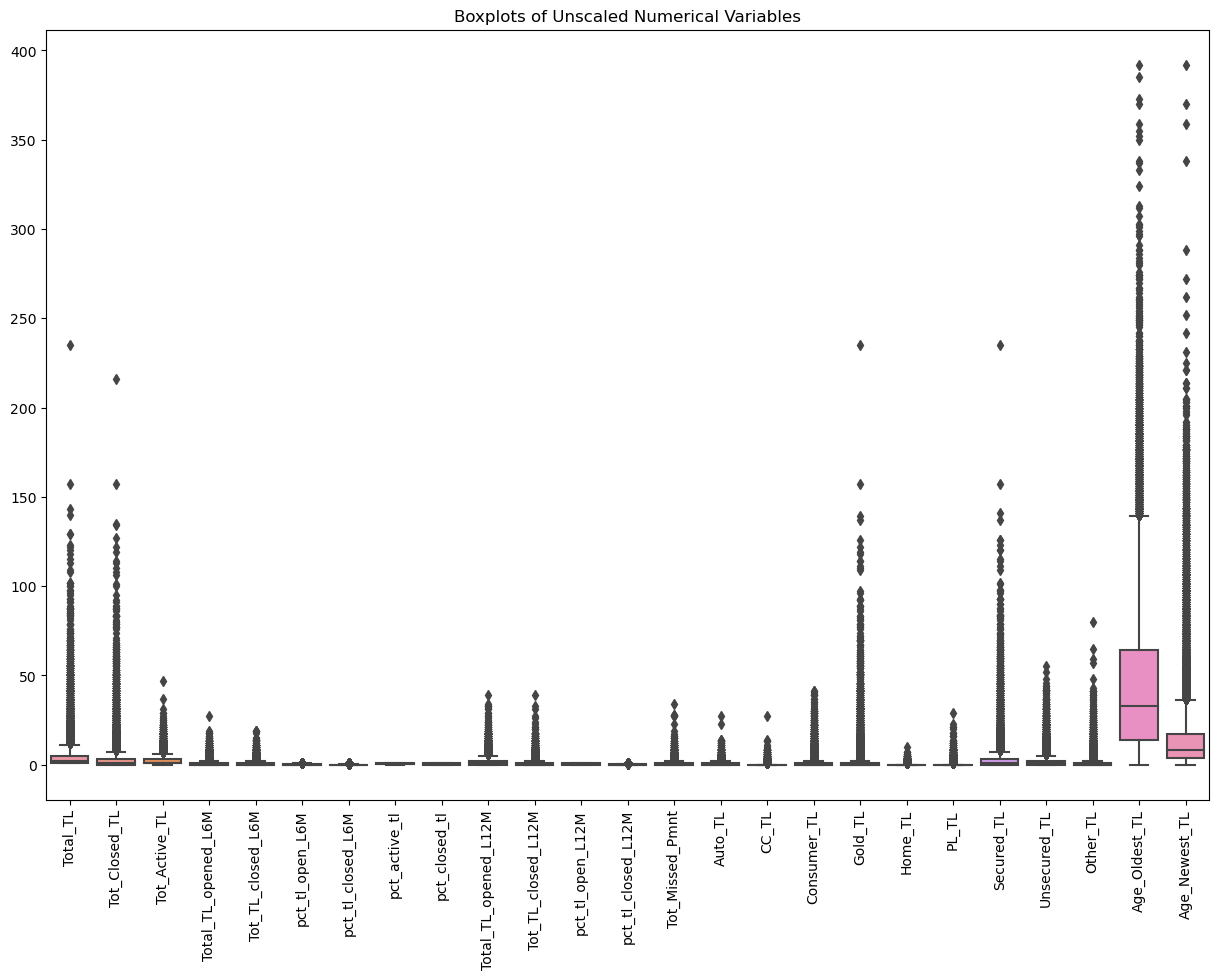

In [148]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_filt)
plt.xticks(rotation=90)
plt.title('Boxplots of Unscaled Numerical Variables')
plt.show()

From the visualizations of the features in both histograms and boxplots, it's clear that the dataset contains outliers

### Remove outliers using IQR

In [149]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bound for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows that have outliers in any column
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_filtered

In [150]:
df1_iqr= remove_outliers_iqr(df1_filt)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Total_TL'),
  Text(1, 0, 'Tot_Closed_TL'),
  Text(2, 0, 'Tot_Active_TL'),
  Text(3, 0, 'Total_TL_opened_L6M'),
  Text(4, 0, 'Tot_TL_closed_L6M'),
  Text(5, 0, 'pct_tl_open_L6M'),
  Text(6, 0, 'pct_tl_closed_L6M'),
  Text(7, 0, 'pct_active_tl'),
  Text(8, 0, 'pct_closed_tl'),
  Text(9, 0, 'Total_TL_opened_L12M'),
  Text(10, 0, 'Tot_TL_closed_L12M'),
  Text(11, 0, 'pct_tl_open_L12M'),
  Text(12, 0, 'pct_tl_closed_L12M'),
  Text(13, 0, 'Tot_Missed_Pmnt'),
  Text(14, 0, 'Auto_TL'),
  Text(15, 0, 'CC_TL'),
  Text(16, 0, 'Consumer_TL'),
  Text(17, 0, 'Gold_TL'),
  Text(18, 0, 'Home_TL'),
  Text(19, 0, 'PL_TL'),
  Text(20, 0, 'Secured_TL'),
  Text(21, 0, 'Unsecured_TL'),
  Text(22, 0, 'Other_TL'),
  Text(23, 0, 'Age_Oldest_TL'),
  Text(24, 0, 'Age_Newest_TL')])

Text(0.5, 1.0, 'Boxplots of Numerical Variables Using IQR')

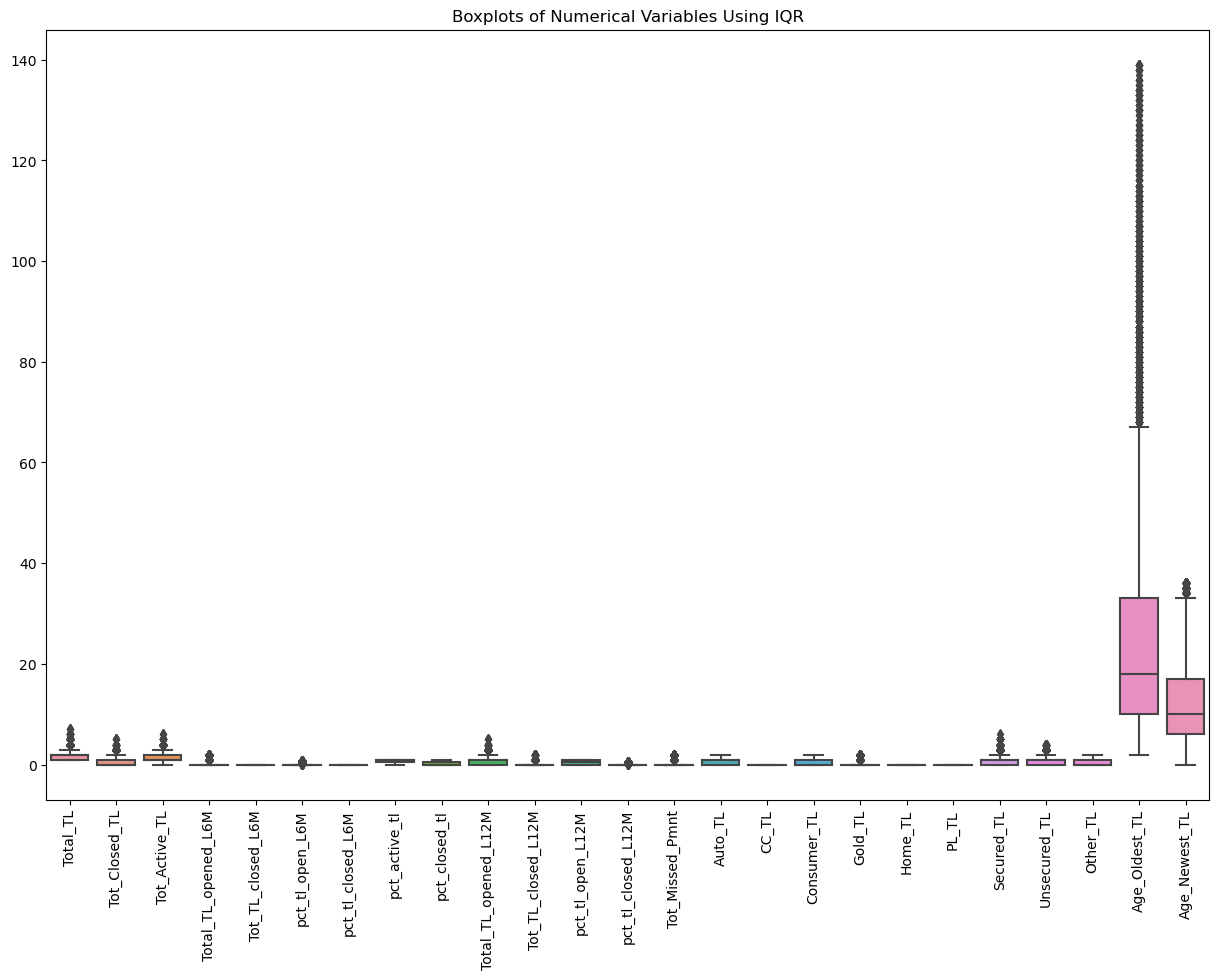

In [151]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_iqr)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables Using IQR')
plt.show()

### Remove outliers using modified Z-score
Instead of using the mean and standard deviation, the modified Z-score uses the median and median absolute deviation (MAD) to handle data with outliers or non-normal distributions better

In [152]:
def remove_outliers_modified_zscore(df, threshold=3):
    median = df.median()
    mad = (df - median).abs().median()
    modified_z_scores = 0.6745 * (df - median) / mad
    return df[(modified_z_scores.abs() < threshold).all(axis=1)]

In [153]:
df1_filt.median()

Total_TL                 2.000
Tot_Closed_TL            1.000
Tot_Active_TL            1.000
Total_TL_opened_L6M      0.000
Tot_TL_closed_L6M        0.000
pct_tl_open_L6M          0.000
pct_tl_closed_L6M        0.000
pct_active_tl            0.556
pct_closed_tl            0.444
Total_TL_opened_L12M     1.000
Tot_TL_closed_L12M       0.000
pct_tl_open_L12M         0.333
pct_tl_closed_L12M       0.000
Tot_Missed_Pmnt          0.000
Auto_TL                  0.000
CC_TL                    0.000
Consumer_TL              0.000
Gold_TL                  0.000
Home_TL                  0.000
PL_TL                    0.000
Secured_TL               1.000
Unsecured_TL             1.000
Other_TL                 0.000
Age_Oldest_TL           33.000
Age_Newest_TL            8.000
dtype: float64

Because the MAD (Median Absolute Deviation) is zero due to columns having many repeated values, using this method would result in an empty DataFrame

### Percentile-Based Outlier Removal

Removes outliers by defining lower and upper bounds based on percentiles. For example, we might remove values below the 1st percentile and above the 99th percentile.It is useful for data with extreme skewness or when we want to remove extreme values at both ends of the distribution

In [154]:
def remove_outliers_percentile(df, lower_percentile=0.01, upper_percentile=0.80):
    lower_bound = df.quantile(lower_percentile)
    upper_bound = df.quantile(upper_percentile)
    return df[(df >= lower_bound) & (df <= upper_bound)].dropna()

In [155]:
percentile_df1= remove_outliers_percentile(df1_filt)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Total_TL'),
  Text(1, 0, 'Tot_Closed_TL'),
  Text(2, 0, 'Tot_Active_TL'),
  Text(3, 0, 'Total_TL_opened_L6M'),
  Text(4, 0, 'Tot_TL_closed_L6M'),
  Text(5, 0, 'pct_tl_open_L6M'),
  Text(6, 0, 'pct_tl_closed_L6M'),
  Text(7, 0, 'pct_active_tl'),
  Text(8, 0, 'pct_closed_tl'),
  Text(9, 0, 'Total_TL_opened_L12M'),
  Text(10, 0, 'Tot_TL_closed_L12M'),
  Text(11, 0, 'pct_tl_open_L12M'),
  Text(12, 0, 'pct_tl_closed_L12M'),
  Text(13, 0, 'Tot_Missed_Pmnt'),
  Text(14, 0, 'Auto_TL'),
  Text(15, 0, 'CC_TL'),
  Text(16, 0, 'Consumer_TL'),
  Text(17, 0, 'Gold_TL'),
  Text(18, 0, 'Home_TL'),
  Text(19, 0, 'PL_TL'),
  Text(20, 0, 'Secured_TL'),
  Text(21, 0, 'Unsecured_TL'),
  Text(22, 0, 'Other_TL'),
  Text(23, 0, 'Age_Oldest_TL'),
  Text(24, 0, 'Age_Newest_TL')])

Text(0.5, 1.0, 'Boxplots of Numerical Variables Using Percentile Outlier Remover')

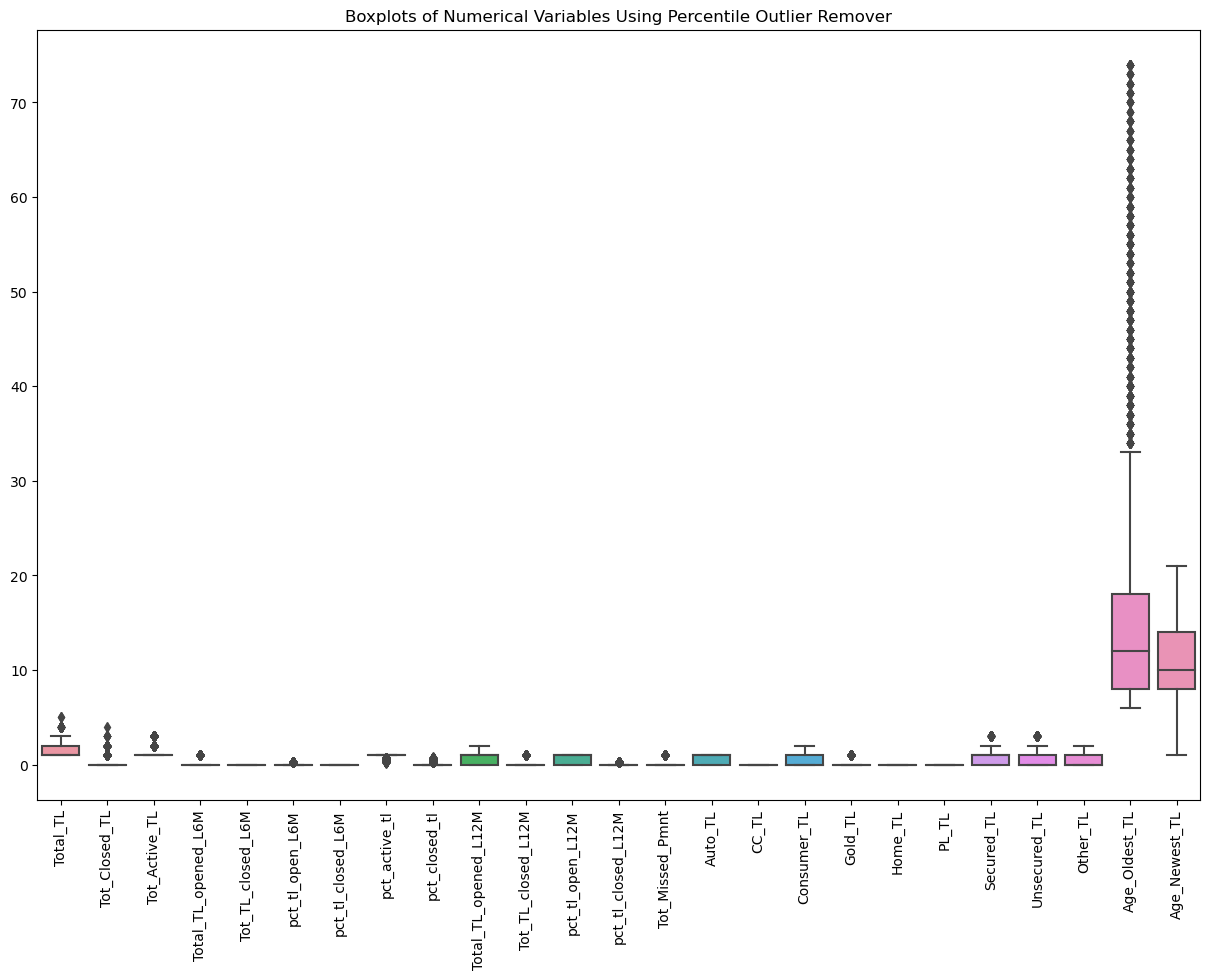

In [156]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=percentile_df1)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables Using Percentile Outlier Remover')
plt.show()

### Transforming data

Next, let's apply some transformation to the data to reduce the impact of outliers.

### Log transformation

Best for right skewed data as it reduces the impact of large positive numbers

In [157]:
df1_log = np.log1p(df1_filt)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Total_TL'),
  Text(1, 0, 'Tot_Closed_TL'),
  Text(2, 0, 'Tot_Active_TL'),
  Text(3, 0, 'Total_TL_opened_L6M'),
  Text(4, 0, 'Tot_TL_closed_L6M'),
  Text(5, 0, 'pct_tl_open_L6M'),
  Text(6, 0, 'pct_tl_closed_L6M'),
  Text(7, 0, 'pct_active_tl'),
  Text(8, 0, 'pct_closed_tl'),
  Text(9, 0, 'Total_TL_opened_L12M'),
  Text(10, 0, 'Tot_TL_closed_L12M'),
  Text(11, 0, 'pct_tl_open_L12M'),
  Text(12, 0, 'pct_tl_closed_L12M'),
  Text(13, 0, 'Tot_Missed_Pmnt'),
  Text(14, 0, 'Auto_TL'),
  Text(15, 0, 'CC_TL'),
  Text(16, 0, 'Consumer_TL'),
  Text(17, 0, 'Gold_TL'),
  Text(18, 0, 'Home_TL'),
  Text(19, 0, 'PL_TL'),
  Text(20, 0, 'Secured_TL'),
  Text(21, 0, 'Unsecured_TL'),
  Text(22, 0, 'Other_TL'),
  Text(23, 0, 'Age_Oldest_TL'),
  Text(24, 0, 'Age_Newest_TL')])

Text(0.5, 1.0, 'Boxplots of Numerical Variables on a Log Scale')

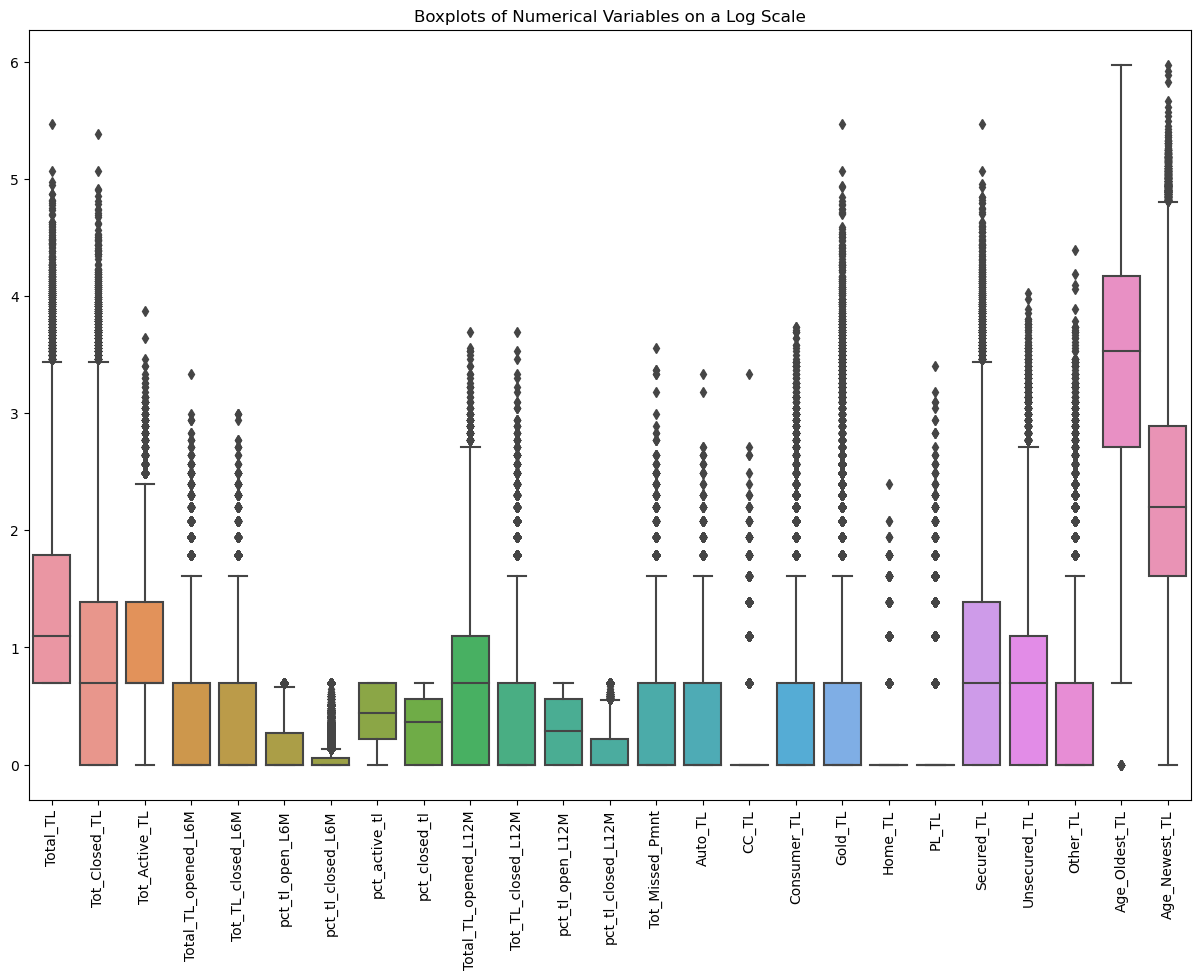

In [158]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_log)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables on a Log Scale')
plt.show()

### Box-Cox Transformation (Positive values only)

Used to stabilize variance and make the data more normal-like. </br>
It works for positive values and offers flexibility in transformation by adjusting the lambda parameter. It is best for data with positive values that require normalization

In [159]:
from scipy import stats
# Define a function to apply Box-Cox transformation to each column
def apply_boxcox(df):
    df_transformed = pd.DataFrame()
    
    for col in df.columns:
        # Check if the column has all positive values
        if (df[col] > 0).all():
            # Apply Box-Cox transformation
            transformed_col, _ = stats.boxcox(df[col])
            df_transformed[col] = transformed_col
        else:
            print(f"Cannot apply Box-Cox on column {col} because it contains zero or negative values.")
    
    return df_transformed

In [160]:
df1_box= apply_boxcox(df1_filt)

Cannot apply Box-Cox on column Tot_Closed_TL because it contains zero or negative values.
Cannot apply Box-Cox on column Tot_Active_TL because it contains zero or negative values.
Cannot apply Box-Cox on column Total_TL_opened_L6M because it contains zero or negative values.
Cannot apply Box-Cox on column Tot_TL_closed_L6M because it contains zero or negative values.
Cannot apply Box-Cox on column pct_tl_open_L6M because it contains zero or negative values.
Cannot apply Box-Cox on column pct_tl_closed_L6M because it contains zero or negative values.
Cannot apply Box-Cox on column pct_active_tl because it contains zero or negative values.
Cannot apply Box-Cox on column pct_closed_tl because it contains zero or negative values.
Cannot apply Box-Cox on column Total_TL_opened_L12M because it contains zero or negative values.
Cannot apply Box-Cox on column Tot_TL_closed_L12M because it contains zero or negative values.
Cannot apply Box-Cox on column pct_tl_open_L12M because it contains zero

### Yeo Johonson Transformation

A variant of Box-Cox that also works for negative values and zero, making it more flexible.</br>
It is best for data that includes negative or zero values.

In [161]:
pt = PowerTransformer(method='yeo-johnson')
df1_yeo = pt.fit_transform(df1_filt)

In [162]:
df1_yeo

array([[ 0.74199209,  1.03517938, -0.34164656, ..., -0.85275617,
         0.89099188,  0.74211844],
       [-1.18587158, -1.16099118, -0.34164656, ..., -0.85275617,
        -1.33382921, -0.14280841],
       [ 1.16299471, -1.16099118,  1.91400629, ..., -0.85275617,
         0.41765253, -1.37077608],
       ...,
       [-0.305155  ,  0.01854431, -0.34164656, ..., -0.85275617,
        -1.1376555 , -0.47614556],
       [-0.305155  ,  0.01854431, -0.34164656, ..., -0.85275617,
        -0.70501514, -0.01226053],
       [-1.18587158, -1.16099118, -0.34164656, ..., -0.85275617,
        -0.44213409,  0.83413385]])

<Axes: >

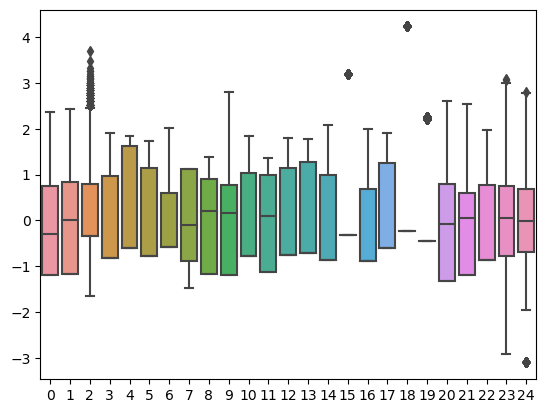

In [163]:
sns.boxplot(data= df1_yeo)

### Robust Scaling

Scales the data based on the interquartile range (IQR), which is robust to outliers. </br> 
It subtracts the median and scales according to the IQR, making it less sensitive to outliers.</br>

It is best for datasets with significant outliers where you want to reduce the influence of extreme values.

In [164]:
scaler = RobustScaler()
df1_robust = scaler.fit_transform(df1_filt)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24')])

Text(0.5, 1.0, 'Boxplots of Numerical Variables on a Log Scale')

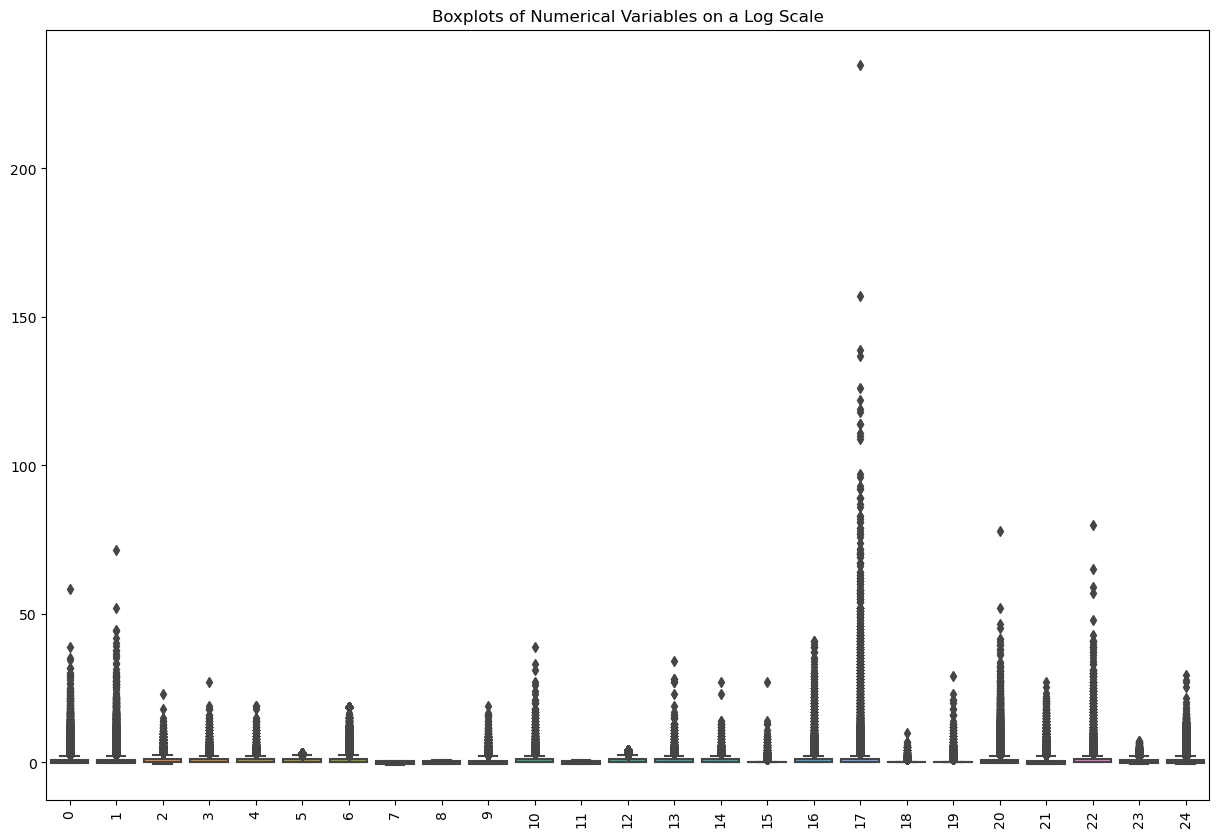

In [165]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_robust)
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables on a Log Scale')
plt.show()

### Min-Max scaling

Scales the data to a fixed range, typically between 0 and 1, by adjusting the minimum and maximum values. However, this method is sensitive to outliers since they can dominate the range.</br>

It is best for when we want to normalize data but we need to be aware of potential sensitivity to outliers.

In [166]:
min_scaler = MinMaxScaler()
df1_min_max = min_scaler.fit_transform(df1_filt)


<Axes: >

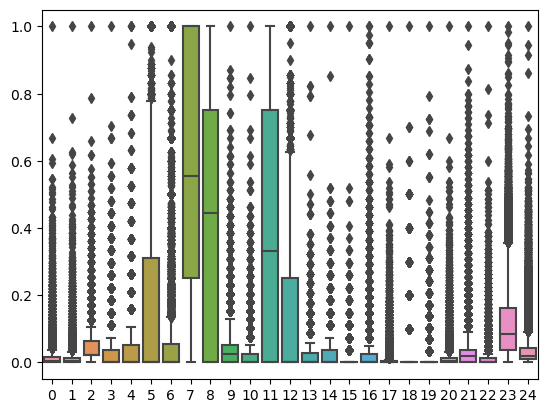

In [167]:
sns.boxplot(data= df1_min_max)

### Winsorization

Winsorization limits extreme values but keeps them in the dataset by setting the outliers to the nearest non-outlier value.</br>
It is best for reducing the impact of extreme outliers while keeping the overall data structure intact.

In [168]:
def apply_winsorization(df, lower_percentile=0.05, upper_percentile=0.05):
    df_winsorized = df.copy()
    
    for col in df_winsorized.select_dtypes(include=[float, int]).columns:  # Apply only to numeric columns
        df_winsorized[col] = winsorize(df_winsorized[col], limits=(lower_percentile, upper_percentile))
    
    return df_winsorized

In [169]:
df1_winso= apply_winsorization(df1_filt)

<Figure size 1500x1000 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Total_TL'),
  Text(1, 0, 'Tot_Closed_TL'),
  Text(2, 0, 'Tot_Active_TL'),
  Text(3, 0, 'Total_TL_opened_L6M'),
  Text(4, 0, 'Tot_TL_closed_L6M'),
  Text(5, 0, 'pct_tl_open_L6M'),
  Text(6, 0, 'pct_tl_closed_L6M'),
  Text(7, 0, 'pct_active_tl'),
  Text(8, 0, 'pct_closed_tl'),
  Text(9, 0, 'Total_TL_opened_L12M'),
  Text(10, 0, 'Tot_TL_closed_L12M'),
  Text(11, 0, 'pct_tl_open_L12M'),
  Text(12, 0, 'pct_tl_closed_L12M'),
  Text(13, 0, 'Tot_Missed_Pmnt'),
  Text(14, 0, 'Auto_TL'),
  Text(15, 0, 'CC_TL'),
  Text(16, 0, 'Consumer_TL'),
  Text(17, 0, 'Gold_TL'),
  Text(18, 0, 'Home_TL'),
  Text(19, 0, 'PL_TL'),
  Text(20, 0, 'Secured_TL'),
  Text(21, 0, 'Unsecured_TL'),
  Text(22, 0, 'Other_TL'),
  Text(23, 0, 'Age_Oldest_TL'),
  Text(24, 0, 'Age_Newest_TL')])

Text(0.5, 1.0, 'Boxplots of Winsorized Numerical Variables')

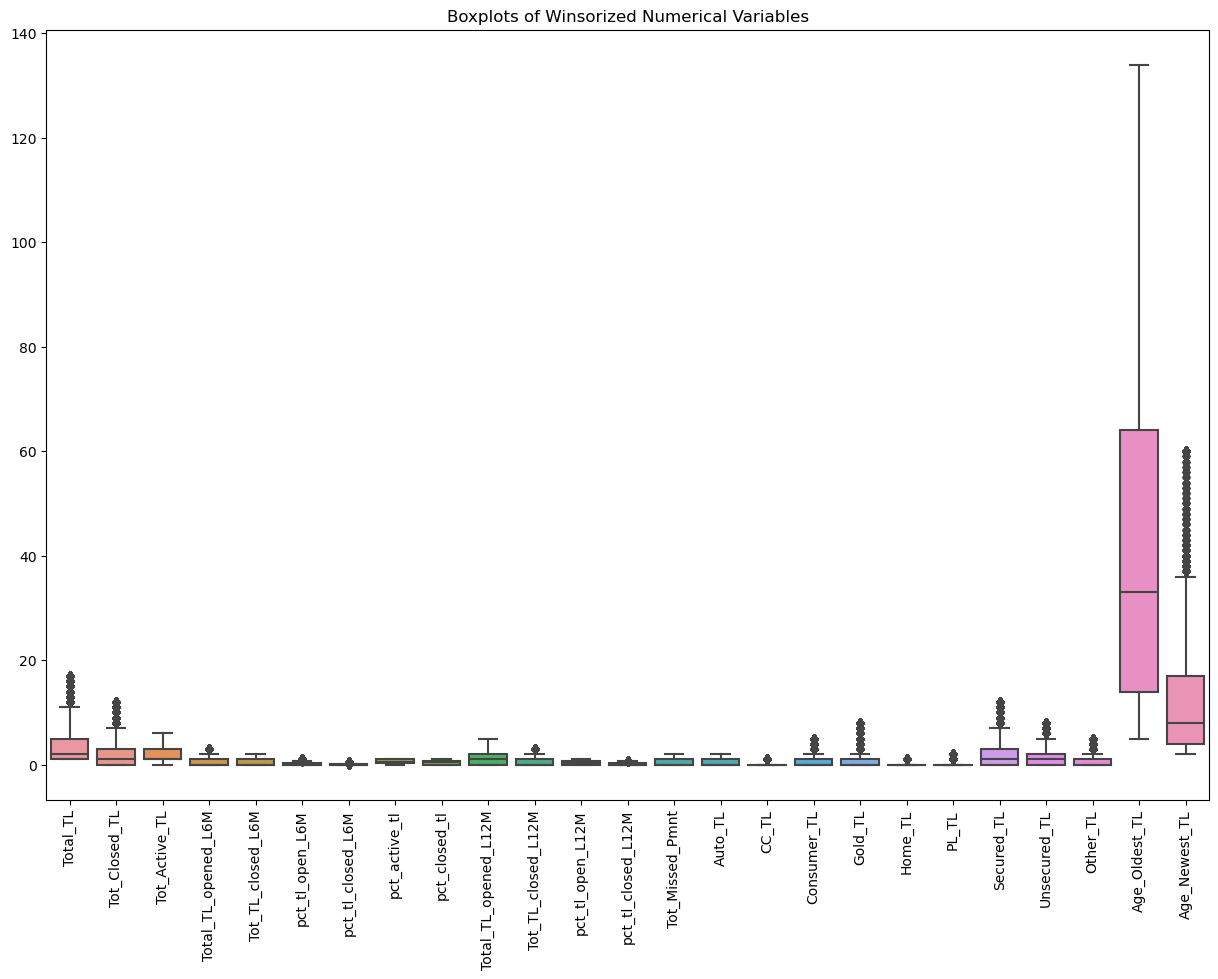

In [170]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1_winso)
plt.xticks(rotation=90)
plt.title('Boxplots of Winsorized Numerical Variables')
plt.show()

## Feature engineering

Create new feattures from existing ones to make the data more suitable for modeling.

1. Account Age Differences: Measures the difference between the oldest and newest accounts to capture account tenure

In [171]:
df1_log.loc[:, 'Account_Tenure'] = df1_log.loc[:, 'Age_Oldest_TL'] - df1_log.loc[:,'Age_Newest_TL']

In [172]:
df1_log['Age_Oldest_TL']
df1_filt['Age_Oldest_TL'].value_counts()

0        4.290459
1        2.079442
2        3.871201
3        1.791759
4        4.882802
           ...   
51331    3.218876
51332    4.317488
51333    2.302585
51334    2.772589
51335    3.044522
Name: Age_Oldest_TL, Length: 51296, dtype: float64

7      1423
8      1393
10     1269
9      1169
6      1105
       ... 
234       1
230       1
262       1
333       1
337       1
Name: Age_Oldest_TL, Length: 294, dtype: int64

<Axes: xlabel='Account_Tenure', ylabel='Count'>

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distriution of Account Tenure')

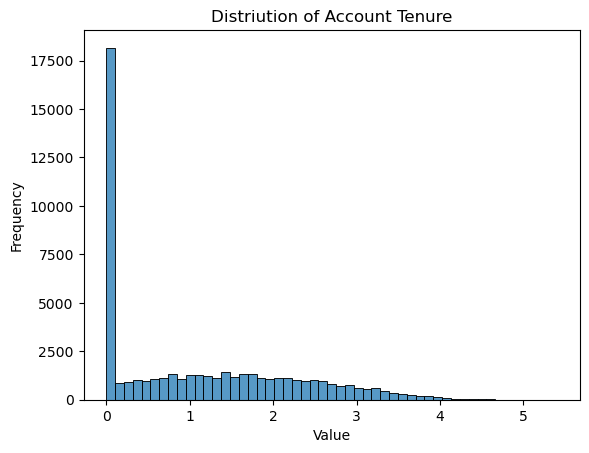

In [173]:
sns.histplot(data=df1_log, x="Account_Tenure")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distriution of Account Tenure')
plt.show()

<Axes: xlabel='Account_Tenure'>

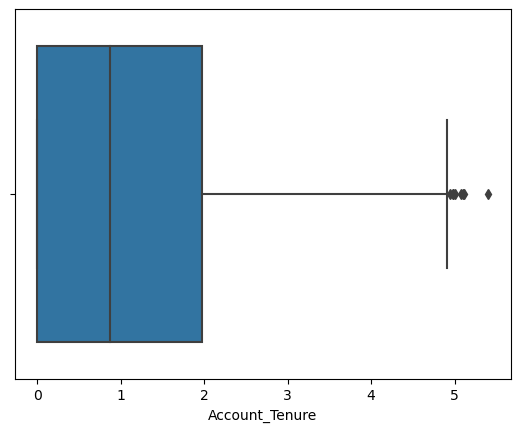

In [174]:
sns.boxplot(x= df1_log["Account_Tenure"])
plt.show()

In [175]:
df1_log.describe()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,Account_Tenure
count,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000
mean,1.424458,0.850361,0.930950,0.385048,0.234026,0.143567,0.071862,0.424113,0.316369,0.690808,0.370575,0.295004,0.119653,0.301219,0.354709,0.073849,0.497747,0.410101,0.042909,0.152692,0.896332,0.783648,0.467460,3.418731,2.305547,1.113184
std,0.738009,0.858451,0.606253,0.524913,0.432815,0.217098,0.154070,0.257247,0.269860,0.633879,0.534920,0.274345,0.190878,0.465405,0.443523,0.249678,0.639853,0.790073,0.189542,0.369179,0.819891,0.739903,0.632324,0.975828,0.960355,1.130801
min,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.693147,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.223144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.708050,1.609438,0.000000
50%,1.098612,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.442118,0.367417,0.693147,0.000000,0.287432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.000000,3.526361,2.197225,0.875469
75%,1.791759,1.386294,1.386294,0.693147,0.693147,0.271553,0.052592,0.693147,0.559616,1.098612,0.693147,0.559616,0.223144,0.693147,0.693147,0.000000,0.693147,0.693147,0.000000,0.000000,1.386294,1.098612,0.693147,4.174387,2.890372,1.969441
max,5.463832,5.379897,3.871201,3.332205,2.995732,0.693147,0.693147,0.693147,0.693147,3.688879,3.688879,0.693147,0.693147,3.555348,3.332205,3.332205,3.737670,5.463832,2.397895,3.401197,5.463832,4.025352,4.394449,5.973810,5.973810,5.402677


In [176]:
df1_log['PROSPECTID'] = df1['PROSPECTID']

In [177]:
df1_log.head()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,Account_Tenure,PROSPECTID
0,1.791759,1.609438,0.693147,0.000000,0.0,0.000000,0.0,0.182322,0.587787,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.693147,0.0,1.609438,0.693147,1.609438,0.000000,4.290459,2.944439,1.346020,1
1,0.693147,0.000000,0.693147,0.000000,0.0,0.000000,0.0,0.693147,0.000000,0.693147,0.0,0.693147,0.0,0.000000,0.000000,0.0,0.693147,0.000000,0.0,0.000000,0.000000,0.693147,0.000000,2.079442,2.079442,0.000000,2
2,2.197225,0.000000,2.197225,0.693147,0.0,0.117783,0.0,0.693147,0.000000,1.098612,0.0,0.223144,0.0,0.693147,0.693147,0.0,1.945910,0.693147,0.0,0.000000,1.098612,1.945910,0.000000,3.871201,1.098612,2.772589,3
3,0.693147,0.000000,0.693147,0.693147,0.0,0.693147,0.0,0.693147,0.000000,0.693147,0.0,0.693147,0.0,0.693147,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.693147,0.693147,1.791759,1.791759,0.000000,4
4,1.386294,1.098612,0.693147,0.000000,0.0,0.000000,0.0,0.287432,0.511026,0.000000,0.0,0.000000,0.0,0.000000,0.693147,0.0,0.000000,0.000000,0.0,0.000000,1.386294,0.000000,1.098612,4.882802,3.496508,1.386294,5


# Preprocessing the External Data File

In [178]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [179]:
df2.shape

(51336, 62)

In [180]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [181]:
df2.select_dtypes(include=['object']).columns

Index(['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2',
       'first_prod_enq2', 'Approved_Flag'],
      dtype='object')

In [182]:
label= df2.loc[:,'Approved_Flag']

In [183]:
label.value_counts()

P2    32199
P3     7452
P4     5882
P1     5803
Name: Approved_Flag, dtype: int64

## Distribution of the target variable

<Axes: xlabel='Approved_Flag', ylabel='count'>

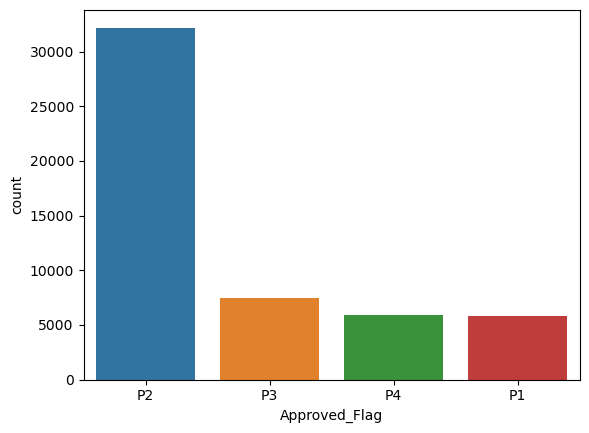

In [185]:
sns.countplot(x='Approved_Flag', data=df2, order = df2['Approved_Flag'].value_counts().index)

In [186]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.750,25668.500,38502.25000,51336.000
time_since_recent_payment,51336.0,-8129.961314,27749.328514,-99999.0,46.000,70.000,161.00000,6065.000
time_since_first_deliquency,51336.0,-70020.091320,45823.312757,-99999.0,-99999.000,-99999.000,8.00000,35.000
time_since_recent_deliquency,51336.0,-70022.375838,45819.820741,-99999.0,-99999.000,-99999.000,3.00000,35.000
num_times_delinquent,51336.0,1.573749,4.165012,0.0,0.000,0.000,1.00000,74.000
max_delinquency_level,51336.0,-70003.987085,45847.976100,-99999.0,-99999.000,-99999.000,15.00000,900.000
max_recent_level_of_deliq,51336.0,13.521953,53.336976,0.0,0.000,0.000,10.00000,900.000
num_deliq_6mts,51336.0,0.184977,0.710240,0.0,0.000,0.000,0.00000,12.000
num_deliq_12mts,51336.0,0.480053,1.522210,0.0,0.000,0.000,0.00000,28.000
num_deliq_6_12mts,51336.0,0.295076,1.027471,0.0,0.000,0.000,0.00000,20.000


<Figure size 4000x2000 with 0 Axes>

<Axes: >

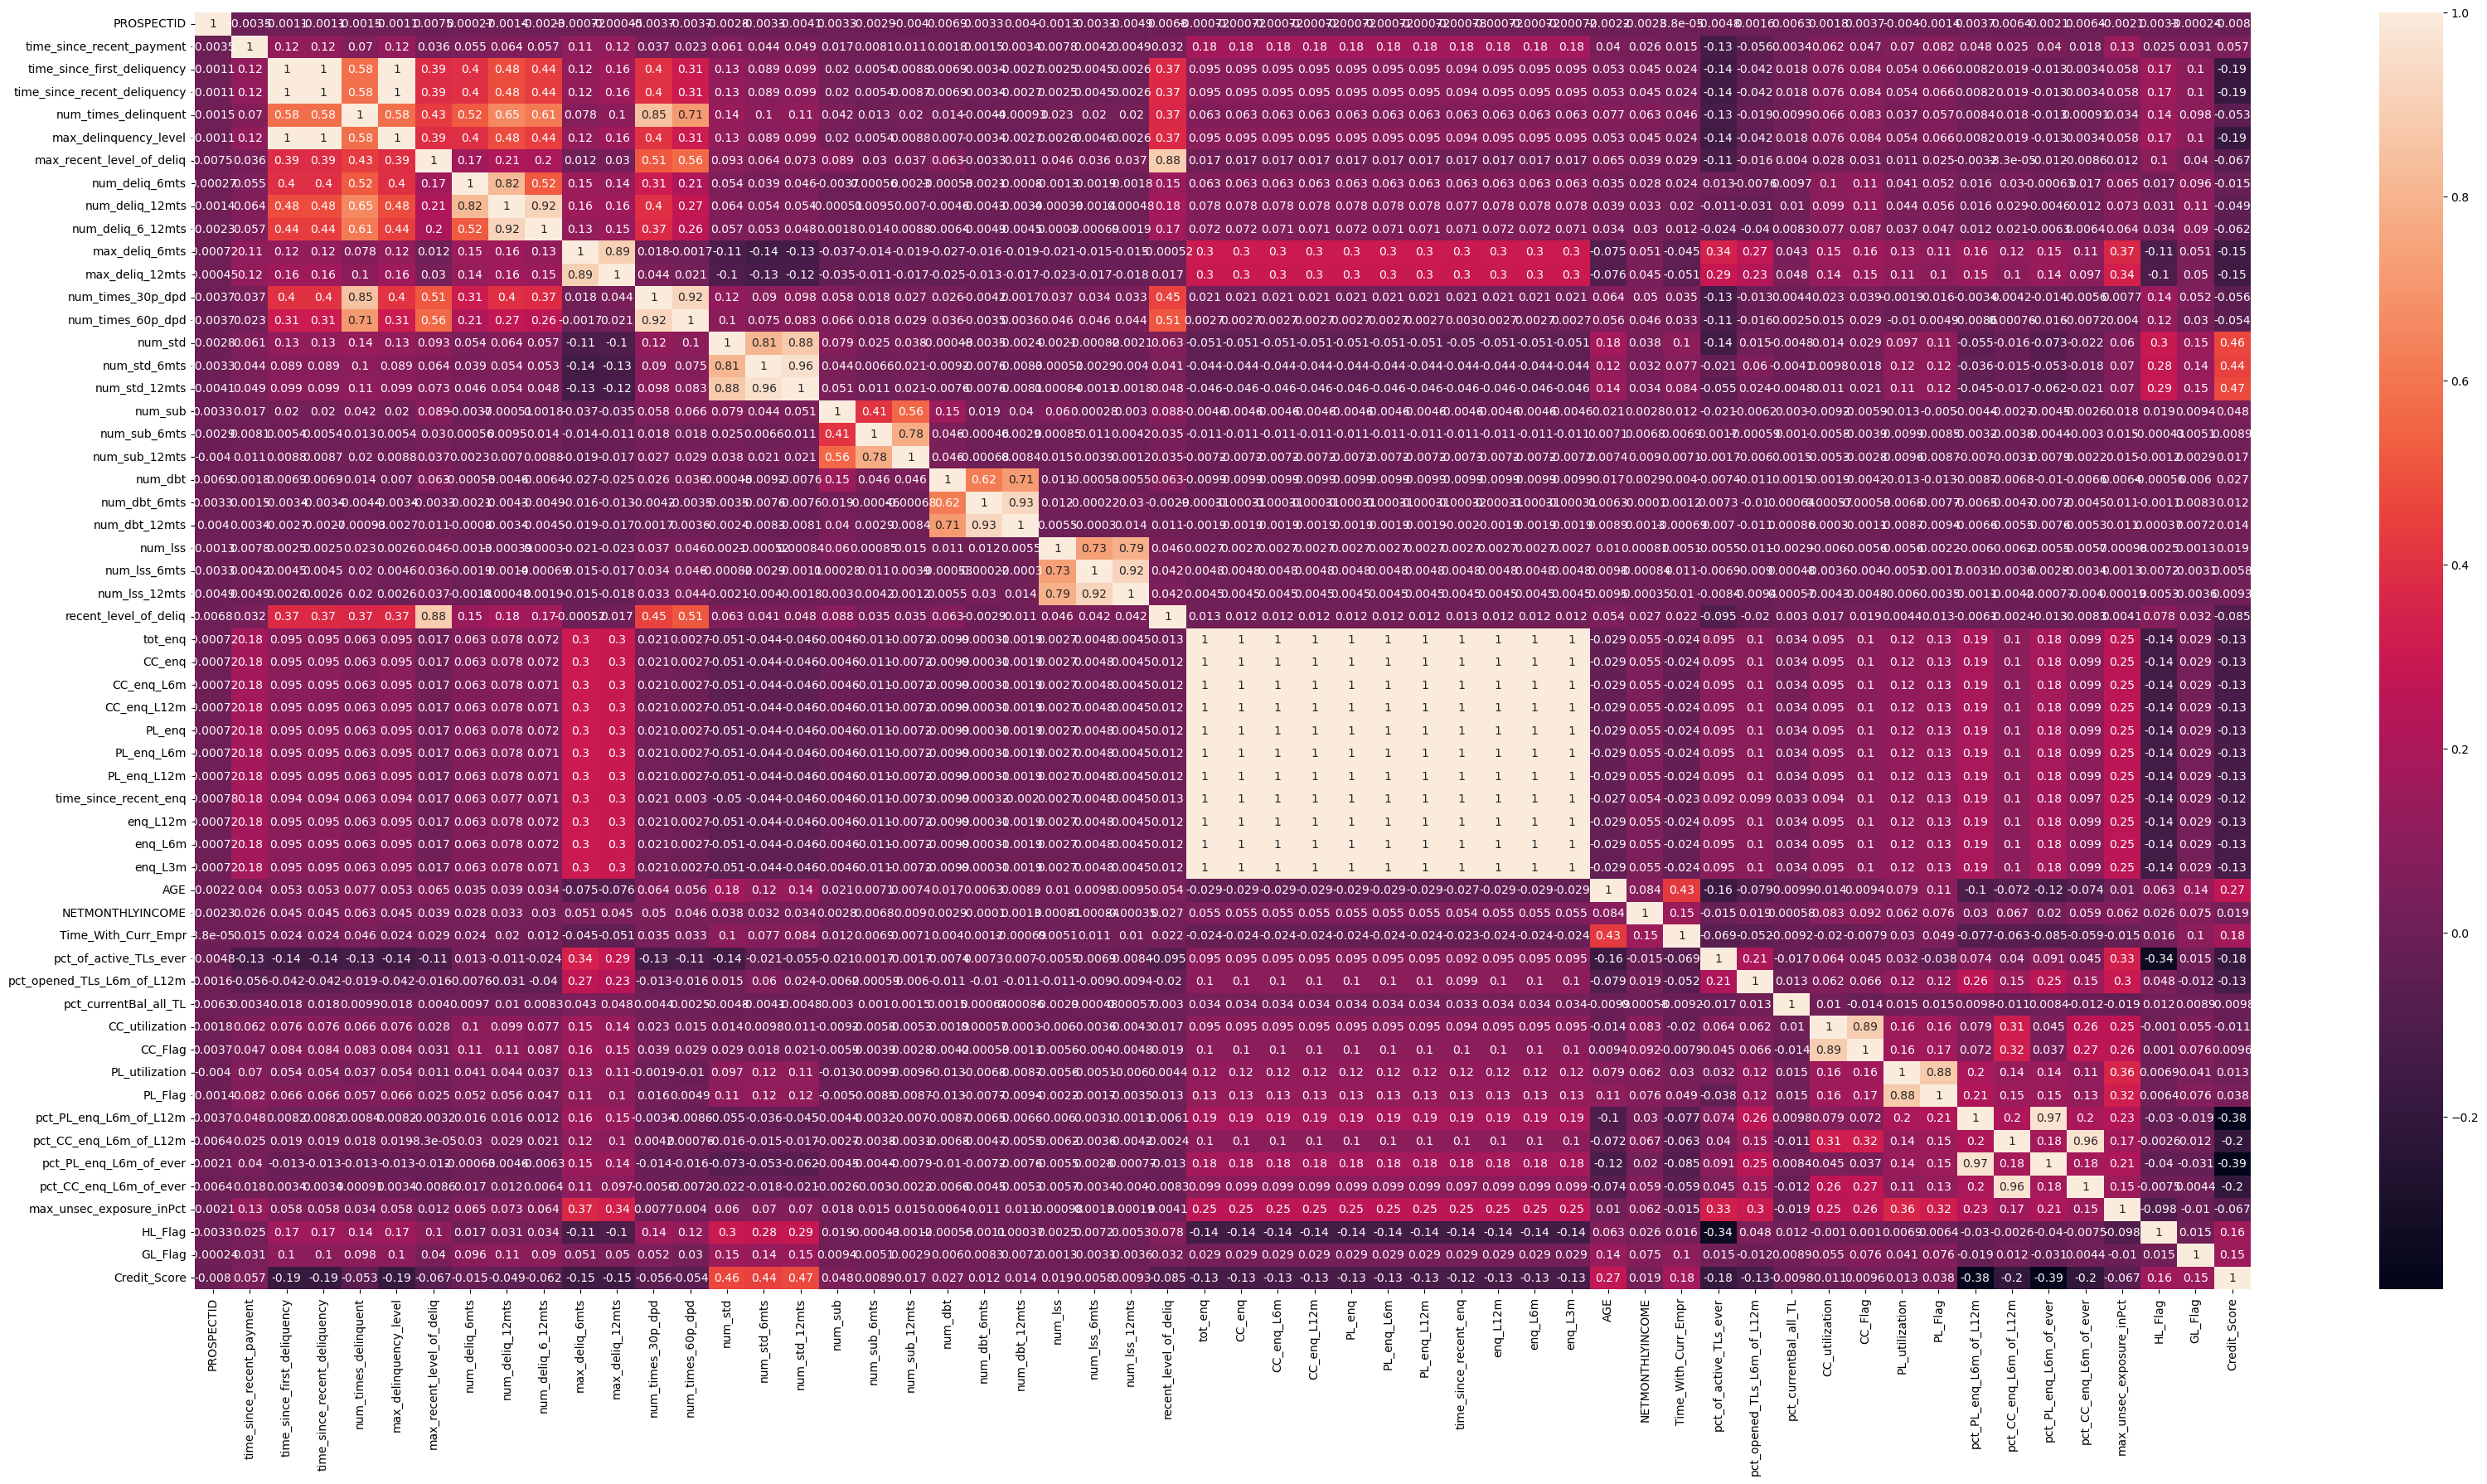

In [188]:
plt.figure(figsize=(40,20))
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [187]:
# numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns
# categorical_cols = df2.select_dtypes(include=['object']).columns

# # Plot histograms for numeric columns
# for col in numeric_cols:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df2[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

## Remove NaNs and Non-Sensical Values

In [189]:
numeric_cols = df2.select_dtypes(include=['number'])

# Select columns that have any negative values
columns_with_negatives = numeric_cols.columns[(numeric_cols < 0).any(axis=0)]
columns_with_negatives

Index(['time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'max_delinquency_level',
       'max_deliq_6mts', 'max_deliq_12mts', 'tot_enq', 'CC_enq', 'CC_enq_L6m',
       'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m', 'PL_enq_L12m',
       'time_since_recent_enq', 'enq_L12m', 'enq_L6m', 'enq_L3m',
       'pct_currentBal_all_TL', 'CC_utilization', 'PL_utilization',
       'max_unsec_exposure_inPct'],
      dtype='object')

In [190]:
df2_nan= df2.replace(-99999,np.nan)

In [192]:
df2_nan.isnull().sum()

# Calculate the proportion of NaN values in each column
nan_proportions = df2_nan.isna().mean()
nan_proportions

PROSPECTID                          0
time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
                                ...  
GL_Flag                             0
last_prod_enq2                      0
first_prod_enq2                     0
Credit_Score                        0
Approved_Flag                       0
Length: 62, dtype: int64

PROSPECTID                      0.000000
time_since_recent_payment       0.083587
time_since_first_deliquency     0.700269
time_since_recent_deliquency    0.700269
num_times_delinquent            0.000000
                                  ...   
GL_Flag                         0.000000
last_prod_enq2                  0.000000
first_prod_enq2                 0.000000
Credit_Score                    0.000000
Approved_Flag                   0.000000
Length: 62, dtype: float64

In [193]:
# Drop columns where the proportion of NaN values is greater than the threshold
threshold= 0.7
df2_cleaned = df2_nan.loc[:, nan_proportions < threshold]

In [194]:
df2_cleaned.shape

(51336, 57)

In [195]:
removed_columns = [col for col in df2.columns if col not in df2_cleaned.columns]
removed_columns

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'CC_utilization',
 'PL_utilization']

These are the columns that have been removed due to having a high percentage of missing values: ['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'CC_utilization',
 'PL_utilization']. Now, let's check the rest of the columns that contain missing values and decide on how to further process them

In [196]:
df2_cleaned.isnull().sum()

PROSPECTID                        0
time_since_recent_payment      4291
num_times_delinquent              0
max_recent_level_of_deliq         0
num_deliq_6mts                    0
num_deliq_12mts                   0
num_deliq_6_12mts                 0
max_deliq_6mts                12890
max_deliq_12mts               10832
num_times_30p_dpd                 0
num_times_60p_dpd                 0
num_std                           0
num_std_6mts                      0
num_std_12mts                     0
num_sub                           0
num_sub_6mts                      0
num_sub_12mts                     0
num_dbt                           0
num_dbt_6mts                      0
num_dbt_12mts                     0
num_lss                           0
num_lss_6mts                      0
num_lss_12mts                     0
recent_level_of_deliq             0
tot_enq                        6321
CC_enq                         6321
CC_enq_L6m                     6321
CC_enq_L12m                 

<Axes: xlabel='time_since_recent_payment', ylabel='Count'>

[]

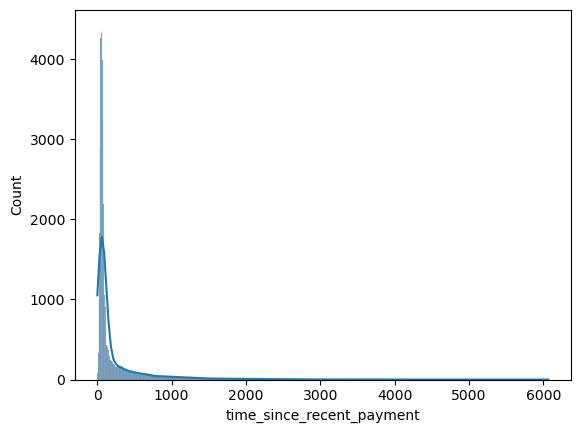

In [112]:
sns.histplot(df2_cleaned['time_since_recent_payment'], kde=True)
plt.plot()

In [113]:
df2_cleaned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.750,25668.500,38502.250,51336.0
time_since_recent_payment,47045.0,249.463599,467.777931,2.0,52.000,74.000,195.000,6065.0
num_times_delinquent,51336.0,1.573749,4.165012,0.0,0.000,0.000,1.000,74.0
max_recent_level_of_deliq,51336.0,13.521953,53.336976,0.0,0.000,0.000,10.000,900.0
num_deliq_6mts,51336.0,0.184977,0.710240,0.0,0.000,0.000,0.000,12.0
num_deliq_12mts,51336.0,0.480053,1.522210,0.0,0.000,0.000,0.000,28.0
num_deliq_6_12mts,51336.0,0.295076,1.027471,0.0,0.000,0.000,0.000,20.0
max_deliq_6mts,38446.0,4.841128,28.628229,0.0,0.000,0.000,0.000,900.0
max_deliq_12mts,40504.0,9.206498,39.463153,0.0,0.000,0.000,0.000,900.0
num_times_30p_dpd,51336.0,0.728884,2.762120,0.0,0.000,0.000,0.000,60.0


In [116]:
df2_cleaned.isnull().sum()
# Proportion of missing values in each row
missing_prop_rows = df2_cleaned.isna().mean(axis=1)

missing_prop_rows

PROSPECTID                        0
time_since_recent_payment      4291
num_times_delinquent              0
max_recent_level_of_deliq         0
num_deliq_6mts                    0
num_deliq_12mts                   0
num_deliq_6_12mts                 0
max_deliq_6mts                12890
max_deliq_12mts               10832
num_times_30p_dpd                 0
num_times_60p_dpd                 0
num_std                           0
num_std_6mts                      0
num_std_12mts                     0
num_sub                           0
num_sub_6mts                      0
num_sub_12mts                     0
num_dbt                           0
num_dbt_6mts                      0
num_dbt_12mts                     0
num_lss                           0
num_lss_6mts                      0
num_lss_12mts                     0
recent_level_of_deliq             0
tot_enq                        6321
CC_enq                         6321
CC_enq_L6m                     6321
CC_enq_L12m                 

0        0.035088
1        0.000000
2        0.000000
3        0.245614
4        0.052632
           ...   
51331    0.000000
51332    0.000000
51333    0.000000
51334    0.000000
51335    0.052632
Length: 51336, dtype: float64

In [122]:
df2_rows = df2_cleaned.dropna(thresh=int(0.3 * df2_cleaned.shape[1]))

In [123]:
df2_rows.shape
df2_cleaned.shape

(51336, 57)

(51336, 57)

It doesn't look like our rows have many missing values, so we will go back to looking into which columns to drop and which to impute

In [129]:
missing_prop_cols = df2_cleaned.isna().mean(axis=0)
missing_prop_cols.sort_values(ascending= False)

max_unsec_exposure_inPct      0.451496
max_deliq_6mts                0.251091
max_deliq_12mts               0.211002
PL_enq                        0.123130
tot_enq                       0.123130
enq_L6m                       0.123130
enq_L12m                      0.123130
time_since_recent_enq         0.123130
PL_enq_L12m                   0.123130
PL_enq_L6m                    0.123130
CC_enq_L12m                   0.123130
CC_enq_L6m                    0.123130
CC_enq                        0.123130
enq_L3m                       0.123130
time_since_recent_payment     0.083587
pct_currentBal_all_TL         0.001403
PL_Flag                       0.000000
pct_CC_enq_L6m_of_L12m        0.000000
Credit_Score                  0.000000
first_prod_enq2               0.000000
last_prod_enq2                0.000000
GL_Flag                       0.000000
HL_Flag                       0.000000
pct_CC_enq_L6m_of_ever        0.000000
pct_PL_enq_L6m_of_ever        0.000000
pct_PL_enq_L6m_of_L12m   

In [130]:
df2_cleaned.corr()

,PROSPECTID,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
PROSPECTID,1.000000,-0.002317,-0.001522,0.007504,0.000265,-0.001400,-0.002258,0.009361,0.006433,-0.003726,-0.003693,-0.002826,-0.003253,-0.004085,0.003257,-0.002940,-0.004049,0.006873,0.003286,0.004043,-0.001317,-0.003263,-0.004871,0.006850,0.003628,0.002559,0.008551,0.008012,-0.000135,0.005309,0.000903,-0.004726,0.005779,0.010387,0.010837,-0.002194,-0.002283,0.000088,-0.004829,0.001649,0.002950,0.003748,-0.001352,0.003666,0.006387,0.002112,0.006415,0.000676,0.003321,-0.000242,-0.008003
time_since_recent_payment,-0.002317,1.000000,-0.048694,0.001486,-0.081346,-0.093382,-0.082104,0.034530,0.036727,-0.005323,0.010861,-0.073298,-0.103522,-0.097103,0.013294,0.000988,0.004823,0.018284,0.019934,0.021691,0.018894,0.015725,0.015937,0.014172,-0.151755,-0.076970,-0.067828,-0.077636,-0.111993,-0.087724,-0.107785,0.340926,-0.155500,-0.111730,-0.068446,0.112905,-0.020952,0.057169,-0.323476,-0.213140,-0.002263,-0.085918,-0.107727,-0.118022,-0.083126,-0.110240,-0.076522,-0.003738,0.016461,-0.035485,0.099295
num_times_delinquent,-0.001522,-0.048694,1.000000,0.432593,0.520053,0.654339,0.609924,0.368122,0.433776,0.847050,0.709824,0.136632,0.104618,0.113740,0.041801,0.013014,0.019784,0.014450,-0.004427,-0.000927,0.023020,0.020237,0.019713,0.366601,0.172097,0.082191,0.014919,0.029859,0.070997,0.002780,0.010612,-0.004862,0.038407,0.026868,0.026082,0.077487,0.063272,0.046112,-0.131791,-0.019442,0.010464,0.082780,0.057367,0.008395,0.017869,-0.013258,0.000915,0.002617,0.144881,0.098119,-0.053259
max_recent_level_of_deliq,0.007504,0.001486,0.432593,1.000000,0.167681,0.210392,0.195789,0.464775,0.575563,0.514088,0.562997,0.092915,0.063554,0.072863,0.088983,0.029918,0.036774,0.062573,-0.003273,0.011470,0.046394,0.035731,0.037111,0.884184,0.083760,0.044681,0.000560,0.009463,0.036634,0.001904,0.006550,0.018876,0.017976,0.015239,0.019761,0.064549,0.039054,0.029285,-0.105940,-0.015806,0.000662,0.031041,0.025083,-0.003199,-0.000083,-0.012337,-0.008579,-0.000634,0.104918,0.040452,-0.066512
num_deliq_6mts,0.000265,-0.081346,0.520053,0.167681,1.000000,0.816674,0.518661,0.500197,0.403077,0.307470,0.212373,0.053983,0.038873,0.045799,-0.003727,0.000564,0.002323,-0.000535,-0.002133,-0.000795,-0.001261,-0.001909,-0.001777,0.145841,0.123069,0.078187,0.025458,0.043032,0.059573,0.008705,0.016987,-0.044620,0.050085,0.029082,0.026289,0.034821,0.027599,0.024281,0.012582,-0.007649,-0.001663,0.113621,0.052165,0.016036,0.030026,-0.000630,0.017399,0.013416,0.017244,0.096296,-0.014668
num_deliq_12mts,-0.001400,-0.093382,0.654339,0.210392,0.816674,1.000000,0.916986,0.427001,0.501975,0.395421,0.274075,0.063785,0.053803,0.053801,-0.000509,0.009522,0.007019,-0.004579,-0.004324,-0.003398,-0.000388,-0.001358,0.000477,0.180297,0.151892,0.085969,0.023963,0.042847,0.069271,0.005708,0.016186,-0.054796,0.053865,0.030769,0.032075,0.039453,0.033003,0.019729,-0.010594,-0.030534,0.001181,0.112005,0.055772,0.015876,0.028520,-0.004576,0.012443,0.004322,0.030763,0.105818,-0.048703
num_deliq_6_12mts,-0.002258,-0.082104,0.609924,0.195789,0.518661,0.916986,1.000000,0.285332,0.462769,0.373281,0.259243,0.057182,0.052838,0.048048,0.001823,0.013717,0.008793,-0.006414,-0.004932,-0.004485,0.000298,-0.000692,0.001935,0.166299,0.139970,0.073347,0.017922,0.033757,0.061